In [4]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [5]:
from tensorflow import keras
keras.__version__

'3.10.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


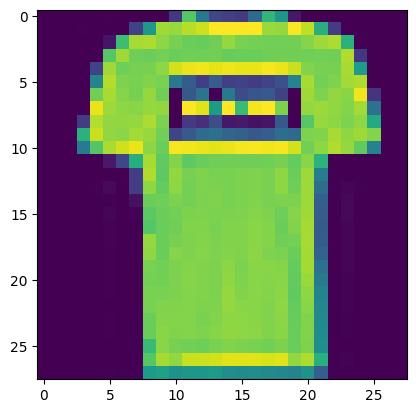

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(X_train_full[1])

In [13]:
y_train_full[0]

np.uint8(9)

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train_full[0]]

'Ankle boot'

In [15]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  35, 177, 155, 140, 151, 172, 191, 187, 186,
        187, 186, 187, 182, 191, 194, 188, 180, 161, 161, 185,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  59, 170, 153, 141, 120, 154, 160, 161, 172,
        168, 166, 161, 165, 172, 170, 164, 139, 149, 162, 166,  21,   0,
          0,   0],
       [  0,   0,   0,   0,  79, 145, 160, 214, 123, 128, 153, 160, 164,
        158, 157, 154, 155, 170, 165, 141, 195, 193, 152, 166,  61,   0,
          0,   0],
       [  0,   0,   0,   0, 100, 157, 225, 245, 175, 113, 174, 158, 158,
        160, 155, 160, 164, 178, 188, 135, 185, 240, 201, 172, 108,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  31, 174,  28, 126, 153, 166, 152, 158,
        158, 160, 161, 157, 168, 191, 188,  18, 132, 159,   7,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  82, 187, 159, 153, 157,
        158, 162, 164, 164, 154, 187, 190,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   3,   5,   0,  37, 175, 158, 155, 162,
        158, 160, 162, 165, 153, 177, 205,   0,   0,   3,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,  25, 175, 152, 160, 158,
        161, 160, 164, 164, 161, 166, 200,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,  30, 171, 147, 164, 155,
        165, 161, 165, 162, 170, 164, 162,   0,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   4,   0,  57, 166, 155, 164, 166,
        161, 161, 164, 167, 165, 165, 162,  28,   0,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   3,   0, 114, 161, 161, 166, 159,
        168, 161, 161, 172, 162, 165, 171,  50,   0,   5,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0, 149, 157, 167, 172, 159,
        172, 164, 161, 172, 170, 160, 171,  89,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   4, 171, 164, 166, 173, 159,
        179, 166, 160, 174, 167, 162, 166, 128,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,  18, 152, 173, 160, 179, 154,
        181, 166, 164, 175, 170, 166, 170, 164,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,  47, 165, 172, 167, 185, 153,
        187, 173, 165, 174, 179, 166, 166, 158,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0,  87, 180, 162, 179, 179, 157,
        191, 182, 165, 168, 190, 173, 165, 166,  20,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   4,   0, 105, 187, 157, 194, 175, 161,
        190, 184, 170, 158, 205, 177, 168, 171,  44,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   5,   0, 138, 181, 158, 205, 160, 167,
        190, 198, 167, 152, 218, 186, 170, 172,  57,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   5,   

In [16]:
X_train_n=X_train_full/255.0
X_test_n=X_test/255.0

In [17]:
X_valid, X_train=X_train_n[:5000], X_train_n[5000:]
y_valid, y_train=y_train_full[:5000], y_train_full[5000:]
X_test=X_test_n

In [18]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

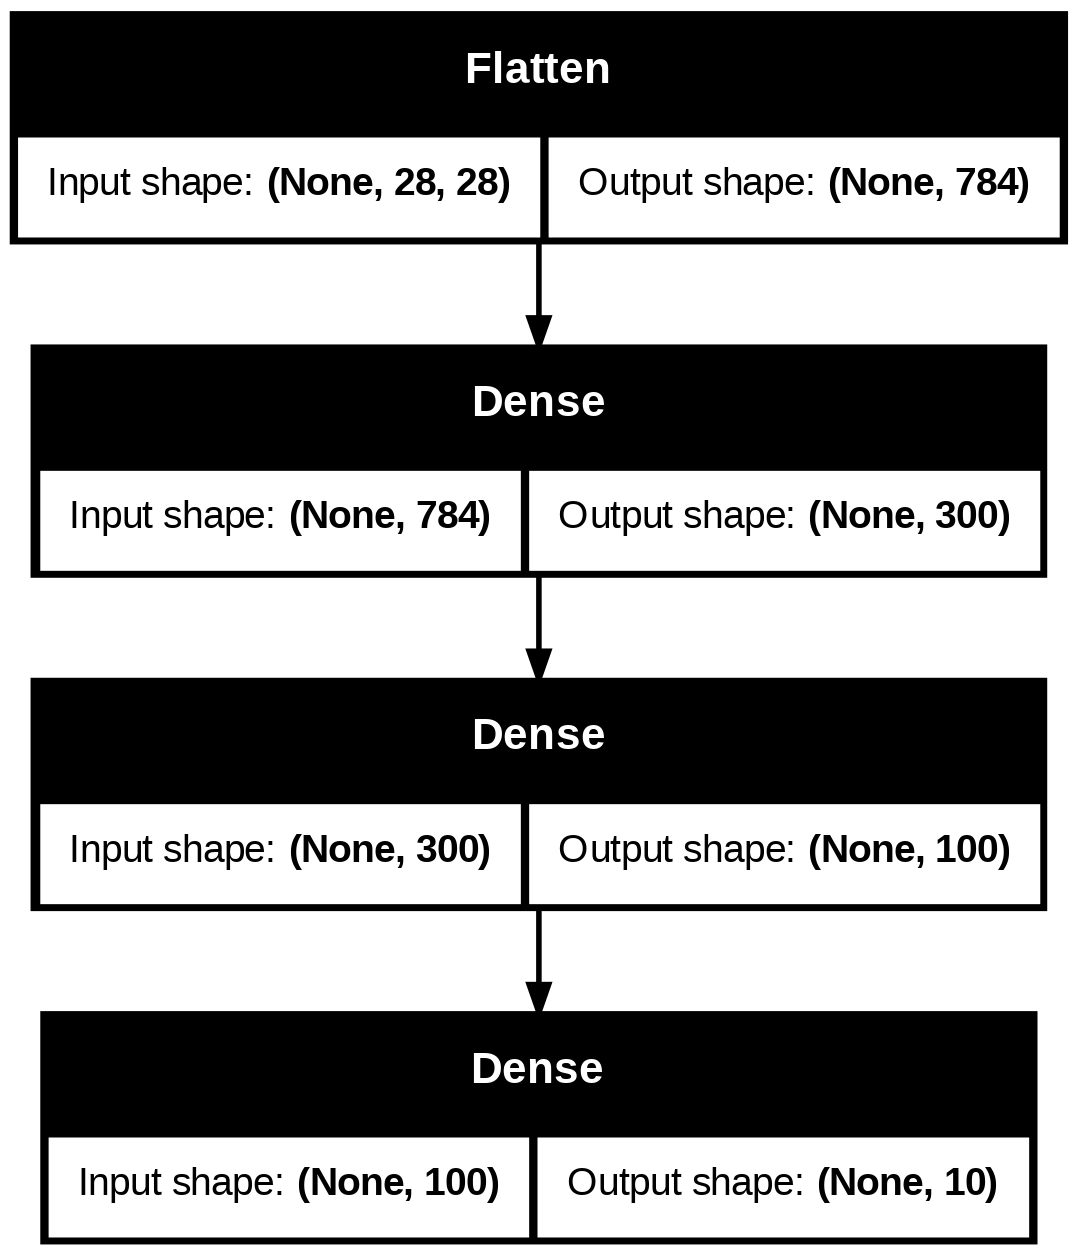

In [23]:
import pydot
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [24]:
weights, biases = model.layers[1].get_weights()

In [25]:
weights

array([[-0.01649255,  0.05972128,  0.03692409, ...,  0.03494243,
        -0.02549526,  0.00366046],
       [-0.00853316,  0.00916765,  0.0003618 , ...,  0.03198185,
        -0.0332671 ,  0.05591364],
       [-0.02885046,  0.03641652,  0.02303262, ...,  0.00323813,
         0.0016062 ,  0.07030468],
       ...,
       [-0.03058419,  0.04489687,  0.07429768, ...,  0.02129371,
        -0.04419299,  0.03364892],
       [-0.04194486, -0.0334523 , -0.02275281, ...,  0.06081042,
        -0.06451286,  0.01014745],
       [ 0.025777  ,  0.02872433, -0.0251841 , ...,  0.05455655,
         0.0301668 ,  0.02219258]], dtype=float32)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [29]:
model_history=model.fit(X_train, y_train, epochs=5,
validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8451 - loss: 0.4411 - val_accuracy: 0.8566 - val_loss: 0.4170
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8546 - loss: 0.4136 - val_accuracy: 0.8622 - val_loss: 0.3959
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8613 - loss: 0.3928 - val_accuracy: 0.8648 - val_loss: 0.3818
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8670 - loss: 0.3769 - val_accuracy: 0.8690 - val_loss: 0.3703
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8713 - loss: 0.3635 - val_accuracy: 0.8738 - val_loss: 0.3611


In [30]:
model_history.params

{'verbose': 'auto', 'epochs': 5, 'steps': 1719}

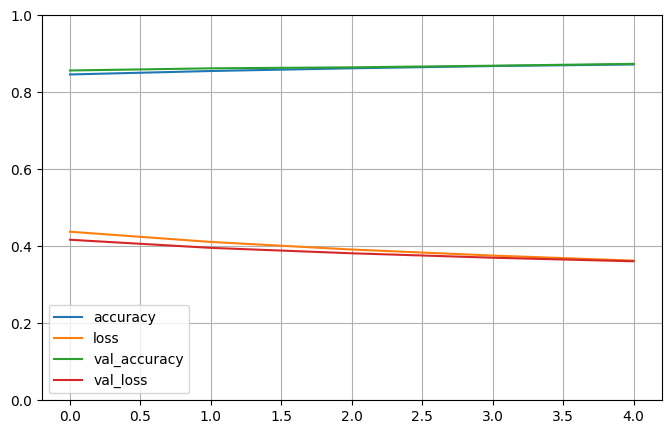

In [31]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()